In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df=pd.read_csv('weatherHistory (1).csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.dtypes
# В dataframe попатаются значения с типами данных: object, float64

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [5]:
df.isna().sum()
#517 пропущенных значений в Precip Type, но строк 96453, маловато пропусков, не буду удалять

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
df.shape

(96453, 12)

In [7]:
df['Loud Cover'].unique()
#Как  понял, в этом столбце только значения 0.0, его можно удалить


array([0.])

<ipython-input-8-8d305621b46c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)


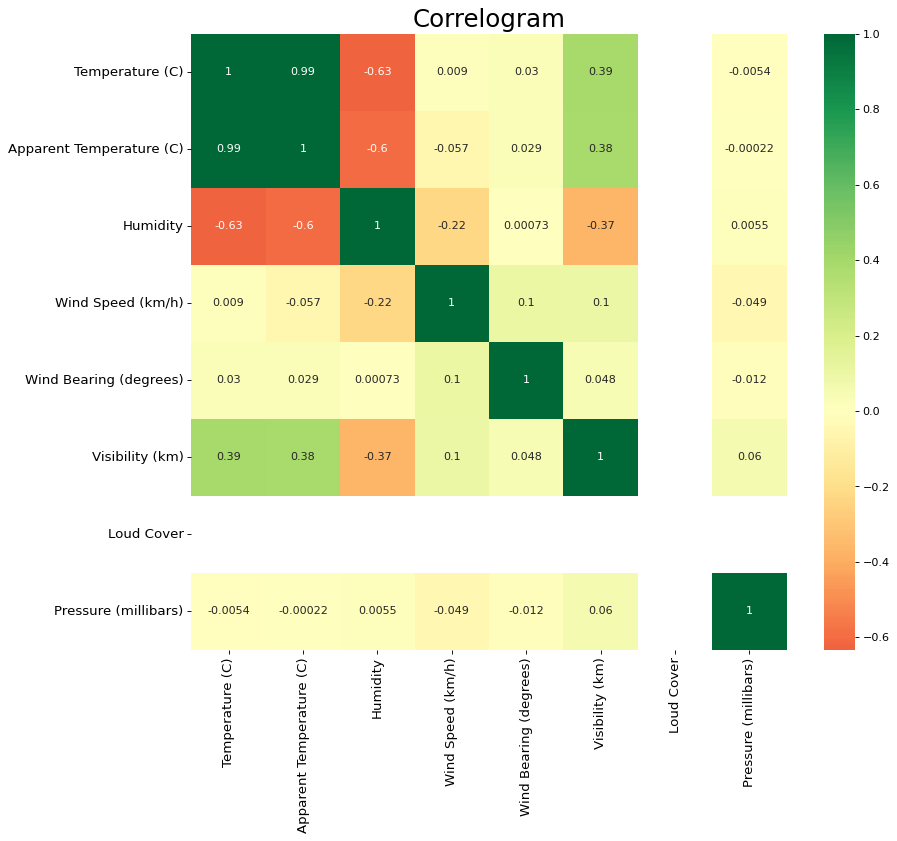

In [8]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
#Корреляция незначительна в столбцах Wind Speed(km/h), Wind Bearing (degrees), Pressure (millibars) поэтому я их удалю

In [10]:
del df['Loud Cover']
df.head()
del df['Precip Type']
del df['Summary']
del df['Formatted Date']
del df['Pressure (millibars)']
del df['Daily Summary']
del df['Wind Bearing (degrees)']
del df['Wind Speed (km/h)']

#Я еще поудалял столбцы где вместо чисел буквы, потому что не знаю че с ними делать
#Емае, мало столбцов как-то осталось, ну ладно :/

KeyError: 'Precip Type'

BP(ax=<Axes: >, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7e6e93831b10>, <matplotlib.lines.Line2D object at 0x7e6e93833040>], 'caps': [<matplotlib.lines.Line2D object at 0x7e6e938331c0>, <matplotlib.lines.Line2D object at 0x7e6e93830790>], 'boxes': [<matplotlib.lines.Line2D object at 0x7e6e93832cb0>], 'medians': [<matplotlib.lines.Line2D object at 0x7e6e93830970>], 'fliers': [<matplotlib.lines.Line2D object at 0x7e6e93830670>], 'means': []})

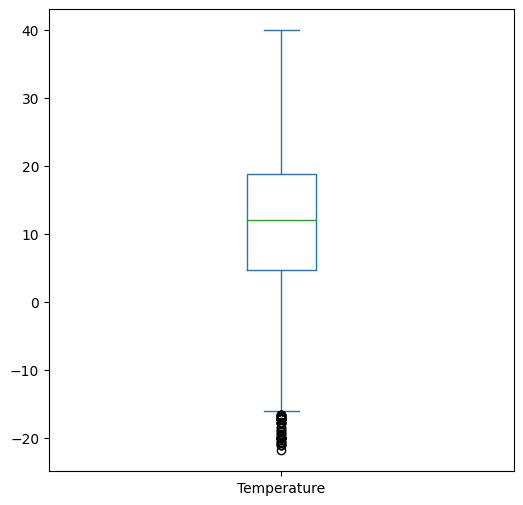

In [11]:
df = df.rename(columns={'Temperature (C)':'Temperature'})
df.Temperature.plot.box(return_type='both', figsize=(6,6))
#Выбросы есть ниже -15

In [12]:
# Вектор признаков
X = df.drop(columns=['Temperature'])

# Вектор целевой переменной
Y = df['Temperature']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')
#80% отводим на тренироку программы, а 20% на тесты

Train dataset size: (77162, 3), (77162,)
Test dataset size: (19291, 3), (19291,)


In [13]:
# Создадим модель линейной регрессии
model = LinearRegression()
# Обучим линейную регрессию на тренировочном стандартизированном наборе данных
model.fit(X_train, y_train)

LinearRegression()

In [14]:
print('Веса всех признаков (w1, ..., w3): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)
#получили вес и коэффицент уравнения

Веса всех признаков (w1, ..., w3):  [ 0.85575317 -2.52354732  0.01826177]
Свободный коэффицент уравнения w0: 4.309410856200525


In [15]:
# Создадим массив названия признаков
features = X_train.columns

coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])
coeff_df['features'] = features

coeff_df.sort_values(by='Coefficient')

,Coefficient,features
1,-2.523547,Humidity
2,0.018262,Visibility (km)
0,0.855753,Apparent Temperature (C)


In [16]:
y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
#Сделаем предсказания

Mean Absolute Error: 0.8218605110543848
Mean Squared Error: 1.1585968056308484
R2 score: 0.9873544189640053


In [ ]:
#Ну кстати, так как все должно быть близко к нулю, а у меня вон вообще числа маленькие, значит программа отличная

In [17]:
#Масштабирование
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import pandas as pd

mmsc = MinMaxScaler()
x_norm = mmsc.fit_transform(X_train)

model = LinearRegression()
model.fit(x_norm, y_train)

print('Веса всех признаков (x1, ..., x3): ', model.coef_)
print('Свободный коэффицент: ', model.intercept_)

y_pred = model.predict(x_norm)

print('Mean Absolute Error: ', mean_absolute_error(y_train, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_train, y_pred))
print('R2: ', r2_score(y_train, y_pred))

Веса всех признаков (x1, ..., x3):  [56.113637   -2.52354732  0.29401444]
Свободный коэффицент:  -18.135093107777077
Mean Absolute Error:  0.8229750532487221
Mean Squared Error:  1.171084127720666
R2:  0.9871488490408984




```
# This is formatted as code
```

Стало чуть чуть лучше, не значительно